Import pandas library

In [ ]:
import pandas as pd

## **Creating Dataframes**

*Specify values for each column*

In [ ]:
df = pd.DataFrame(
{"a" : [4, 5, 6],
"b" : [7, 8, 9],
"c" : [10, 11, 12]},
index = [1, 2, 3])


*Specify values for each row*

In [ ]:
df2 = pd.DataFrame(
[[4, 7, 10],
[5, 8, 11],
[6, 9, 12]],
index=[1, 2, 3],
columns=['a', 'b', 'c']) 

*Create DataFrame with a MultiIndex*

In [ ]:
df3 = pd.DataFrame(
{"a" : [4 ,5, 6],
"b" : [7, 8, 9],
"c" : [10, 11, 12]},
index = pd.MultiIndex.from_tuples(
[('d', 1), ('d', 2),
('e', 2)], names=['n', 'v']))


## **Reshaping Data - Change Layout, Sorting, Rename, Reindexing**

*Layout*

*Gather columns into rows*

In [ ]:
pd.melt(df)


,variable,value
0,a,4
1,a,5
2,a,6
3,b,7
4,b,8
5,b,9
6,c,10
7,c,11
8,c,12


*Append rows of DataFrames*


In [ ]:
pd.concat([df,df2])


,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12
1,4,7,10
2,5,8,11
3,6,9,12


*Append columns*

In [ ]:
pd.concat([df,df2], axis=1)

,a,b,c,a,b,c
1,4,7,10,4,7,10
2,5,8,11,5,8,11
3,6,9,12,6,9,12


**Sorting**

In [ ]:
df.sort_values('a')

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [ ]:
df.sort_values('a', ascending=False)

,a,b,c
3,6,9,12
2,5,8,11
1,4,7,10


In [ ]:
df.sort_index()

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


**Rename**

In [ ]:
df.rename(columns = {'a':'year'})


,year,b,c
1,4,7,10
2,5,8,11
3,6,9,12


**Subset Observations**

In [ ]:
df.drop_duplicates()

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


Randomly select n rows

In [ ]:
df.sample(n=2)

,a,b,c
1,4,7,10
2,5,8,11


In [ ]:
df.head(1)


,a,b,c
1,4,7,10


In [ ]:
df.tail(2)


,a,b,c
2,5,8,11
3,6,9,12


Select rows between

In [ ]:
df2.iloc[1:3]

,a,b,c
2,5,8,11
3,6,9,12


In [ ]:
df2.iloc[:, [0, 1]]


,a,b
1,4,7
2,5,8
3,6,9


## **Summarize Data**

Count no. of rows of unique variable in dataframe

In [ ]:
df['a'].value_counts()


4    1
5    1
6    1
Name: a, dtype: int64

Length of rows in dataframe

In [ ]:
len(df)

3

Tuple of # of rows, # of columns in DataFrame.

In [ ]:
df.shape

(3, 3)

No. of distinct values in a column

In [ ]:
df['b'].nunique()

3

Basic descriptive and statistics for each column (or GroupBy)

In [ ]:
df.describe()

,a,b,c
count,3.0,3.0,3.0
mean,5.0,8.0,11.0
std,1.0,1.0,1.0
min,4.0,7.0,10.0
25%,4.5,7.5,10.5
50%,5.0,8.0,11.0
75%,5.5,8.5,11.5
max,6.0,9.0,12.0


## **Combine Data Sets**

Join matching rows from df2 to df

In [ ]:
pd.merge(df, df2,
how='left', on='a')

,a,b_x,c_x,b_y,c_y
0,4,7,10,7,10
1,5,8,11,8,11
2,6,9,12,9,12


Join matching rows from df to df2

In [ ]:
pd.merge(df, df2,
how='right', on='b')

,a_x,b,c_x,a_y,c_y
0,4,7,10,4,10
1,5,8,11,5,11
2,6,9,12,6,12


Join data. Retain only rows in both sets.

In [ ]:
pd.merge(df, df2,
how='inner', on='a')

,a,b_x,c_x,b_y,c_y
0,4,7,10,7,10
1,5,8,11,8,11
2,6,9,12,9,12


Join data. Retain all values, all rows.

In [ ]:
pd.merge(df, df2,
how='outer', on='c')


,a_x,b_x,c,a_y,b_y
0,4,7,10,4,7
1,5,8,11,5,8
2,6,9,12,6,9


**Set like operations**

Intersection

In [ ]:
pd.merge(df, df2)


,a,b,c
0,4,7,10
1,5,8,11
2,6,9,12


Union

In [ ]:
pd.merge(df, df2, how='outer')

,a,b,c
0,4,7,10
1,5,8,11
2,6,9,12


## **Make New Columns**

Compute and append one or more new columns.

In [ ]:
df.assign(Area=lambda df: df.a*df.b)

,a,b,c,Area
1,4,7,10,28
2,5,8,11,40
3,6,9,12,54


Add single column

In [ ]:
df['product'] = df.a*df.b*df.c

Bin column into n buckets

In [ ]:
pd.qcut(df.a, 2, labels=False)


1    0
2    0
3    1
Name: a, dtype: int64

## **Handling Missing Data**

Drop rows with any column having NA/null data.

In [ ]:
df.dropna()

,a,b,c,product
1,4,7,10,280
2,5,8,11,440
3,6,9,12,648


Replace all NA/null data with value

In [ ]:
df.fillna(333)


,a,b,c,product
1,4,7,10,280
2,5,8,11,440
3,6,9,12,648


## **Windows**

Return an Expanding object allowing summary functions to be
applied cumulatively.

In [ ]:
df.expanding()

Expanding [min_periods=1,center=False,axis=0,method=single]

Return a Rolling object allowing summary functions to be
applied to windows of length n.

In [ ]:
df.rolling(1)


Rolling [window=1,center=False,axis=0,method=single]

## **Plotting**

*Histogram for each column*

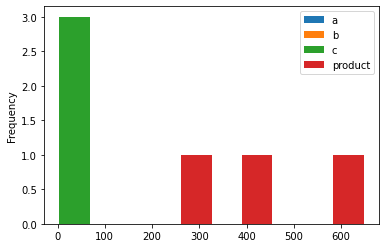

In [ ]:
df.plot.hist()

*Scatter chart using pairs of points*

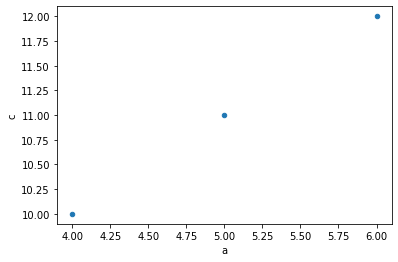

In [ ]:
df.plot.scatter(x='a',y='c')